In [1]:
# Variable
# 1. Pendapatan Bulanan (PB): Rendah (0-2 juta), Sedang (2-5 juta), Tinggi (5-10 juta)
# 2. Utang (U): Rendah (0-10% dari PB), Sedang (10-30% dari PB), Tinggi (>30% dari PB)
# 3. Riwayat Kredit (RK): Buruk (0-50%), Sedang (50-80%), Baik (>80%)
# 4. Kelayakan Kredit (KK): Tidak Layak (0-30%), Layak (30-70%), Sangat Layak (>70%)

# Rule
# 1. Jika PB rendah dan U tinggi, maka KK tidak layak.
# 2. Jika PB sedang dan U sedang, maka KK layak.
# 3. Jika PB tinggi dan RK baik, maka KK sangat layak.
# 4. Jika RK buruk, maka KK tidak layak.


# 1. Pendapatan Bulanan:
# - Rendah: μ(x) = 1 untuk x ≤ 2 juta, μ(x) = (5-x)/3 untuk 2 < x ≤ 5
# - Sedang: μ(x) = (x-2)/3 untuk 2 < x ≤ 5, μ(x) = (10-x)/5 untuk 5 < x ≤ 10
# - Tinggi: μ(x) = 1 untuk x > 5
# 2. Utang:
# - Rendah: μ(x) = 1 untuk x ≤ 10%, μ(x) = (30-x)/20 untuk 10 < x ≤ 30
# - Sedang: μ(x) = (x-10)/20 untuk 10 < x ≤ 30, μ(x) = (100-x)/70 untuk 30 < x ≤ 100
# - Tinggi: μ(x) = 1 untuk x > 30
# 3. Riwayat Kredit:
# - Buruk: μ(x) = 1 untuk x ≤ 50%, μ(x) = (80-x)/30 untuk 50 < x ≤ 80
# - Sedang: μ(x) = (x-50)/30 untuk 50 < x ≤ 80, μ(x) = (100-x)/20 untuk 80 < x ≤ 100
# - Baik: μ(x) = 1 untuk x > 80


In [23]:
import numpy as np
import matplotlib.pyplot as plt

class FuzzySystem:
    def __init__(self):
        self.min_pb = 0
        self.max_pb = 10000000
        self.min_u = 0
        self.max_u = 100
        self.min_rk = 0
        self.max_rk = 100

    def membership_pb(self, x):
        if x <= 2000000:
            return 1
        elif x <= 5000000:
            return (5000000 - x) / 3000000
        else:
            return 0

    def membership_u(self, x):
        if x <= 10:
            return 1
        elif x <= 30:
            return (30 - x) / 20
        else:
            return 0

    def membership_rk(self, x):
        if x <= 50:
            return 1
        elif x <= 80:
            return (80 - x) / 30
        else:
            return 0

    def inferensi(self, pb, u, rk):
        pb_keanggotaan = self.membership_pb(pb)
        u_keanggotaan = self.membership_u(u)
        rk_keanggotaan = self.membership_rk(rk)
        
        if pb_keanggotaan < 0.5 and u_keanggotaan > 0.5:
            return "Tidak Layak"
        elif pb_keanggotaan >= 0.5 and pb_keanggotaan < 0.8 and u_keanggotaan >= 0.5:
            return "Layak"
        elif pb_keanggotaan >= 0.8 and rk_keanggotaan > 0.5:
            return "Sangat Layak"
        else:
            return "Tidak Layak"

    def plot_membership_pb(self):
        x = np.linspace(self.min_pb, self.max_pb, 100)
        y = [self.membership_pb(i) for i in x]
        plt.plot(x, y)
        plt.xlabel('Pendapatan Bulanan')
        plt.ylabel('Keanggotaan')
        plt.title('Fungsi Keanggotaan Pendapatan Bulanan')
        plt.show()

    def plot_membership_u(self):
        x = np.linspace(self.min_u, self.max_u, 100)
        y = [self.membership_u(i) for i in x]
        plt.plot(x, y)
        plt.xlabel('Utang')
        plt.ylabel('Keanggotaan')
        plt.title('Fungsi Keanggotaan Utang')
        plt.show()

    def plot_membership_rk(self):
        x = np.linspace(self.min_rk, self.max_rk, 100)
        y = [self.membership_rk(i) for i in x]
        plt.plot(x, y)
        plt.xlabel('Riwayat Kredit')
        plt.ylabel('Keanggotaan')
        plt.title('Fungsi Keanggotaan Riwayat Kredit')
        plt.show()



Kasus Layak:
Pendapatan Bulanan:  6000000
Utang:  10 %
Riwayat Kredit:  70 %
Kelayakan Kredit:  Tidak Layak

Kasus Sangat Layak:
Pendapatan Bulanan:  9000000
Utang:  10 %
Riwayat Kredit:  70 %
Kelayakan Kredit:  Tidak Layak


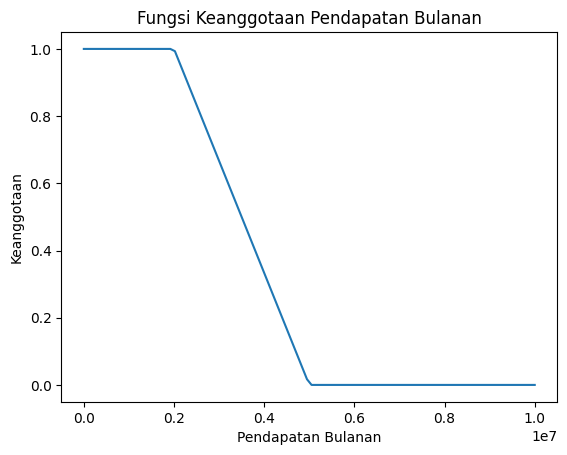

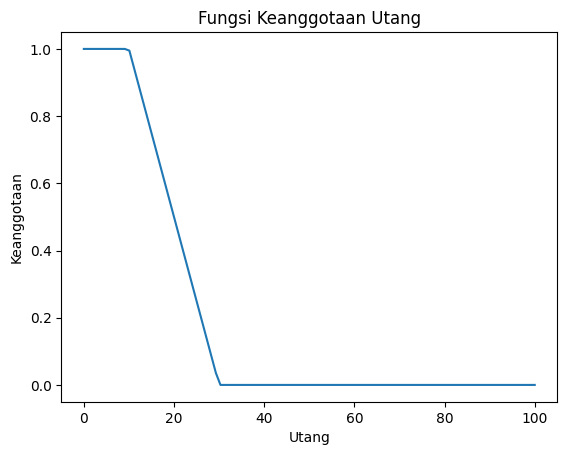

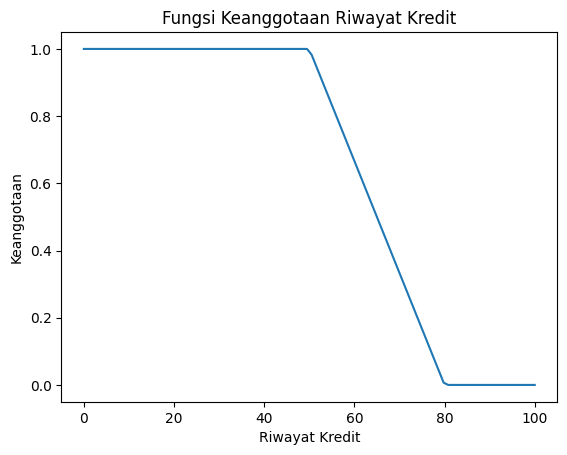

In [24]:
## Main Program

fuzzy_system = FuzzySystem()

## Kasus Layak
pendapatan_bulanan = 6000000 
utang = 10
riwayat_kredit = 70 

hasil_layak = fuzzy_system.inferensi(pendapatan_bulanan, utang, riwayat_kredit)

print("Kasus Layak:")
print("Pendapatan Bulanan: ", pendapatan_bulanan)
print("Utang: ", utang, "%")
print("Riwayat Kredit: ", riwayat_kredit, "%")
print("Kelayakan Kredit: ", hasil_layak)

## Kasus Sangat Layak
pendapatan_bulanan = 9000000 
utang = 10
riwayat_kredit = 70 

hasil_sangat_layak = fuzzy_system.inferensi(pendapatan_bulanan, utang, riwayat_kredit)

print("\nKasus Sangat Layak:")
print("Pendapatan Bulanan: ", pendapatan_bulanan)
print("Utang: ", utang, "%")
print("Riwayat Kredit: ", riwayat_kredit, "%")
print("Kelayakan Kredit: ", hasil_sangat_layak)

## Plot Grafik
fuzzy_system.plot_membership_pb()
fuzzy_system.plot_membership_u()
fuzzy_system.plot_membership_rk()
